# Sample

This sample shows how the lightroot project works. Note important settings are confined to a settings file so that we try
to make the slow batch jobs parameterless. The method names should be self-explantory - we sharpen images, pluck centroids and show a sample of the overlay. This process is carried out in batch to create a dataframe of blobs which is saved to txt files in the cached data folder. Having extracted centroids for all frames, the tracker builds the identities and writes the result to the cached data folder

In [1]:
%matplotlib inline
import lightroot

08/02/2018 20:47:10 INFO:loaded lightroot


# 1 Manually set file templates for processing

In [2]:
pth  ="C:/Users/mrsir/Box Sync/uncut/Images/310717/"
lightroot.SETTINGS["stack_files"] = pth+"Run0140_tp{:0>3}.tif"
lightroot.SETTINGS["maxint_files"] = pth+"Run0140_tp{}_MIP.tif"

# 2 Loading frames

08/02/2018 20:48:17 INFO(0):Stack loaded from C:/Users/mrsir/Box Sync/uncut/Images/310717/Run0140_tp000.tif


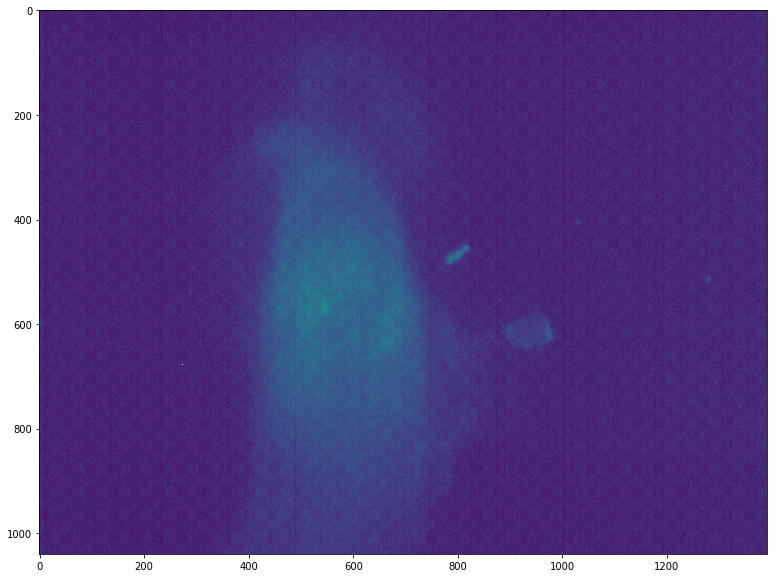

In [9]:
sample_time_frame =0
stack = lightroot.io.get_stack(sample_time_frame)
lightroot.io.plotimg(stack)
#max_int = lightroot.io.get_max_int(sample_time_frame)
#lightroot.io.plotimg(max_int)
#lightroot.io.stats(stack, ylim=(0,86832150), xlim=(0,0.1), normed_hist=False)

# 3 Full frame detection routine

08/02/2018 20:48:18 INFO(0):projecting 2d mask to 3d mask...
08/02/2018 20:48:19 INFO(0):checking shine @ 32561.00
08/02/2018 20:48:19 WARN(0):bright frame detected. removing bottom
08/02/2018 20:48:19 INFO(0):extracted root region with volume 13748400 with non-zero 0.24%
08/02/2018 20:48:19 INFO(0):clipped root, offset at [(226, 415, 910, 750)]
08/02/2018 20:48:28 INFO(0):sharpening done. percentage non-zero is 16.96%
08/02/2018 20:48:33 INFO(0):Found 7 centroids


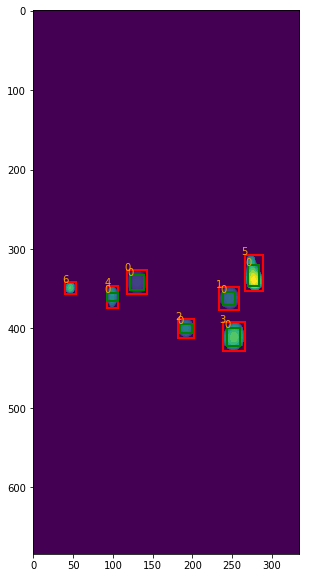

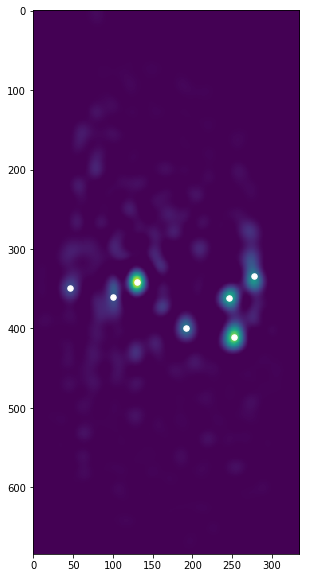

In [10]:
blob_centroids,stack = lightroot.blobs.detect(stack,  display_detections=True) #sharpen_iter=2, isolate_iter=2,
lightroot.io.overlay_blobs(stack,blob_centroids)

# 4 Running batch process

In [ ]:
lightroot.process("C:/Users/mrsir/Box Sync/uncut/images/083117/149/", log_to_file=False)

# 5 Low-level steps

## isolating roots via lowband

### 2d

08/02/2018 20:47:18 INFO(0):projecting 2d mask to 3d mask...
08/02/2018 20:47:19 INFO(0):checking shine @ 32561.00
08/02/2018 20:47:19 WARN(0):bright frame detected. removing bottom
08/02/2018 20:47:19 INFO(0):extracted root region with volume 13748400 with non-zero 0.24%


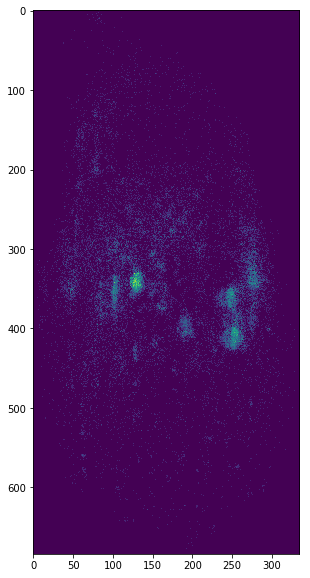

In [4]:
stack = lightroot.blobs.low_pass_2d_proj_root_segmentation(stack)
lightroot.io.plotimg(stack)

# 3d

In [5]:
# stack= lightroot.blobs.low_pass_root_segmentation(stack)
# lightroot.io.plotimg(stack_sample)

## sharpening root region

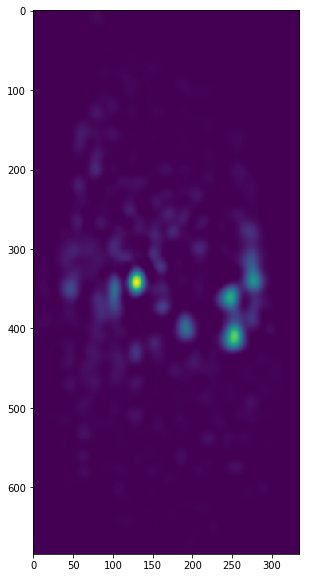

In [6]:
stack = lightroot.blobs.sharpen(stack, iterations=1)
lightroot.io.plotimg(stack)

## isolating blobs in data

08/02/2018 20:47:24 INFO(0):sharpening done. percentage non-zero is 15.51%


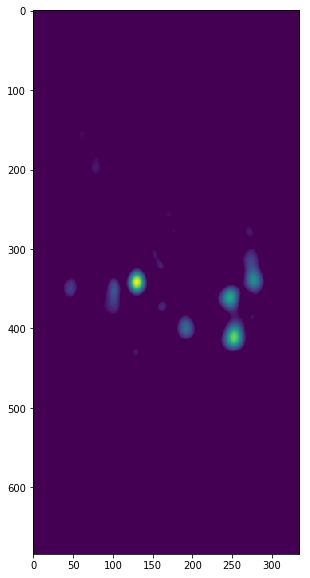

In [7]:
stack = lightroot.blobs.isolate(stack, iterations=1)
ax = lightroot.io.plotimg(stack)

## marking centroids

08/02/2018 20:47:33 INFO(0):Found 12 centroids


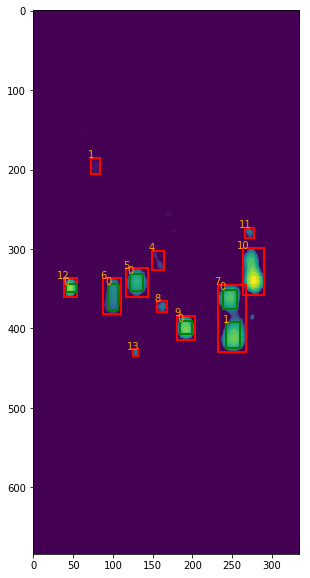

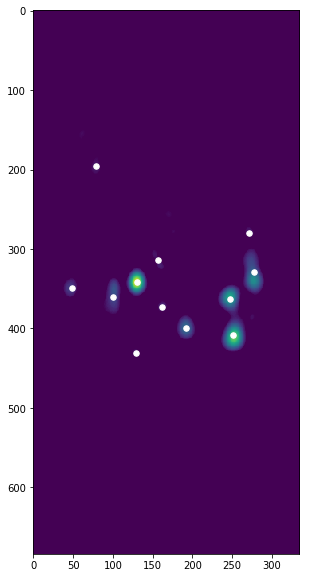

In [8]:
blobs_centroids = lightroot.blobs.blob_centroids(stack, display=True, max_final_ecc=0.95,min_final_volume=1000, underlying_image=stack)
lightroot.io.overlay_blobs(stack,blobs_centroids)

In [ ]:
# from scipy.ndimage import maximum_filter,gaussian_filter,label

# from skimage import data, feature
# from skimage.measure import regionprops

# bl = gaussian_filter(tile1,sigma=1)
# lightroot.io.plotimg(bl)
# labs = label(bl)[0]
# lightroot.io.plotimg(labs)

# largest = 0
# region = None

# for r in regionprops(labs):
#     if r.area > largest:
#         largest = r.area
#         region = r
        
#         print(r.area)
        
# lab = region.label

# #create a new image
# flat_stack = stack_sample.sum(0)
# output = np.zeros_like(flat_stack)
# output[labs==lab] = flat_stack[labs==lab]

# lightroot.io.plotimg(output)